## Importing libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [2]:
Data = pd.read_csv("Salary_dataset.csv")
df = pd.DataFrame(Data,columns= ["YearsExperience","Salary"])
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [3]:
df.shape

(30, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [6]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
X = df["YearsExperience"].values.reshape(-1,1)
y = df["Salary"].values.reshape(-1,1)

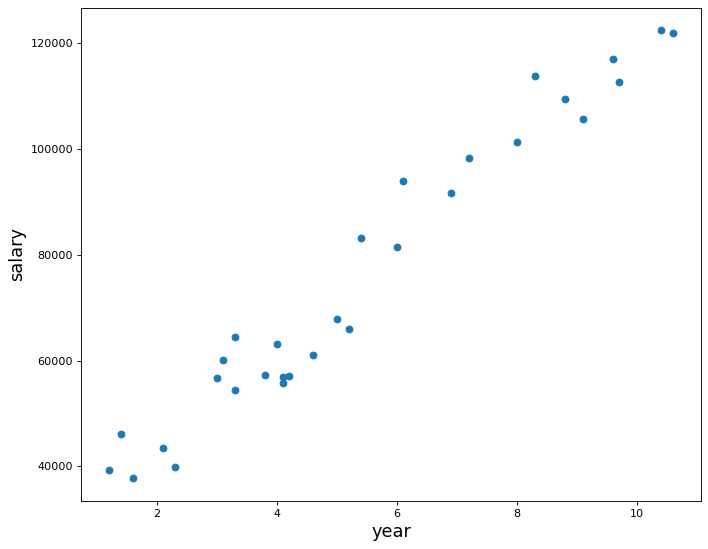

In [8]:
plt.figure(figsize=(10,8),dpi = 80)
plt.scatter(X,y)
plt.xlabel("year",size = 16)
plt.ylabel("salary",size = 16)
plt.show()

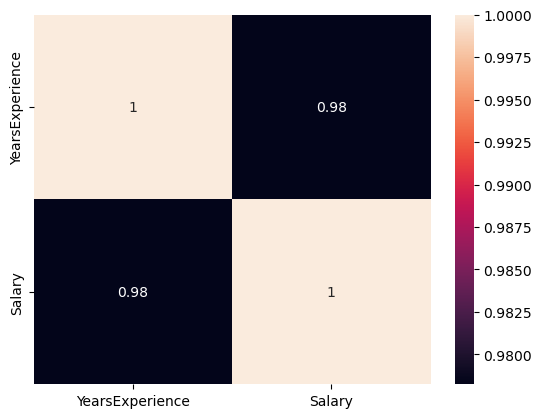

In [9]:
sns.heatmap(df.corr(),annot=True)
plt.show()

# train and test splitting

In [10]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train , X_test, y_train, y_test

(array([[10.4],
        [ 8.8],
        [ 4.1],
        [ 1.2],
        [ 2.3],
        [ 5.2],
        [ 3. ],
        [ 4.2],
        [ 4.1],
        [ 8. ],
        [ 1.4],
        [ 1.6],
        [ 9.1],
        [ 2.1],
        [ 7.2],
        [ 9.6],
        [ 6. ],
        [10.6],
        [ 6.9],
        [ 3.3],
        [ 4. ],
        [ 4.6],
        [ 6.1],
        [ 3.1]]),
 array([[9.7],
        [5. ],
        [8.3],
        [5.4],
        [3.3],
        [3.8]]),
 array([[122392.],
        [109432.],
        [ 56958.],
        [ 39344.],
        [ 39892.],
        [ 66030.],
        [ 56643.],
        [ 57082.],
        [ 55795.],
        [101303.],
        [ 46206.],
        [ 37732.],
        [105583.],
        [ 43526.],
        [ 98274.],
        [116970.],
        [ 81364.],
        [121873.],
        [ 91739.],
        [ 54446.],
        [ 63219.],
        [ 61112.],
        [ 93941.],
        [ 60151.]]),
 array([[112636.],
        [ 67939.],
        [113813.],
       

# Linear Regression Model

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [12]:
print(regressor.intercept_)
print(regressor.coef_)

[24380.20147947]
[[9423.81532303]]


In [13]:
y_predict = regressor.predict(X_test)
y_predict = y_predict.round(0)
y_predict

array([[115791.],
       [ 71499.],
       [102598.],
       [ 75269.],
       [ 55479.],
       [ 60191.]])

# Evaluating the Model 

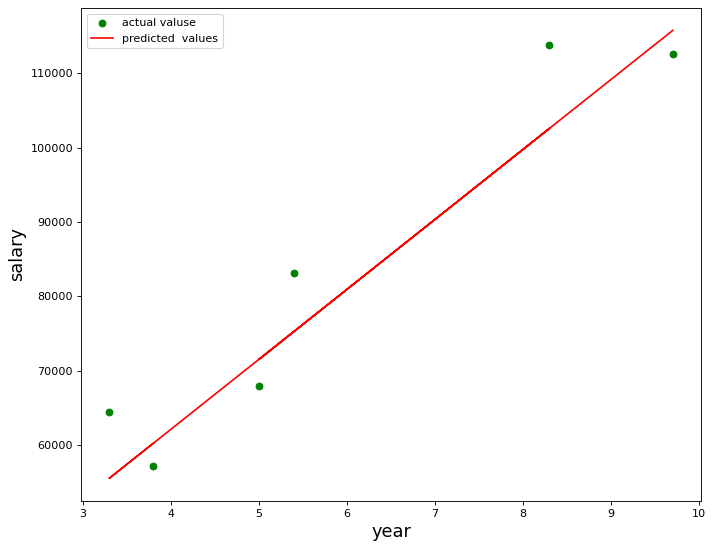

In [14]:
plt.figure(figsize=(10,8),dpi = 80)
plt.scatter(X_test,y_test,c = "g",label = "actual valuse")
plt.plot(X_test,y_predict,c = "r", label = "predicted  values")
plt.xlabel("year",size = 16)
plt.ylabel("salary",size = 16)
plt.legend()
plt.show()

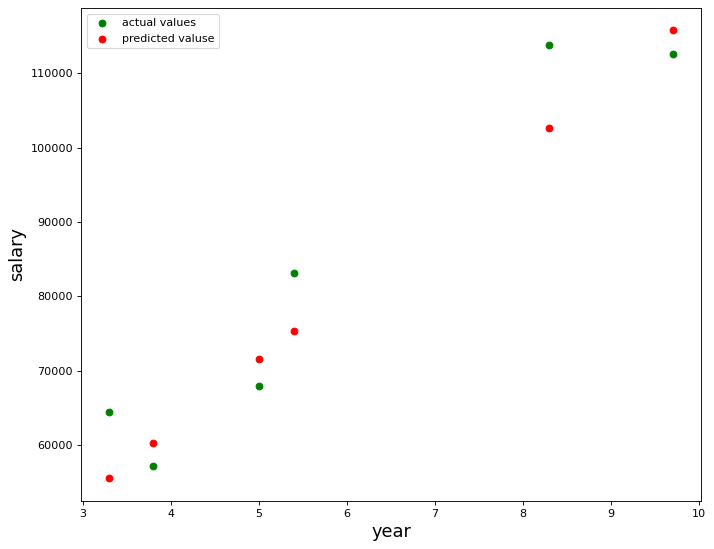

In [15]:
plt.figure(figsize=(10,8),dpi = 80)
plt.scatter(X_test,y_test,c = "g",label = "actual values")
plt.scatter(X_test,y_predict,c="r", label = "predicted valuse")
plt.xlabel("year",size = 16)
plt.ylabel("salary",size = 16)
plt.legend()
plt.show()

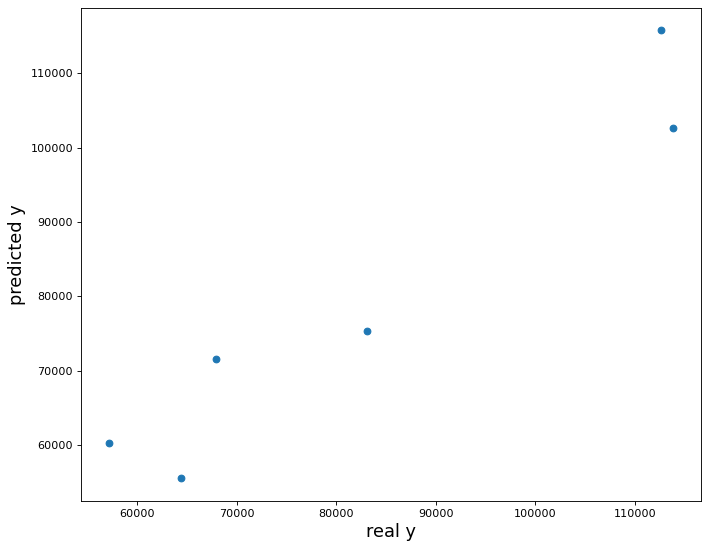

In [16]:
plt.figure(figsize=(10,8),dpi = 80)
plt.scatter(y_test,y_predict)
plt.xlabel("real y",size = 16)
plt.ylabel("predicted y",size = 16)
plt.show()

In [17]:
X_test = np.reshape(X_test,(X_test.shape[0]))
y_test = np.reshape(y_test,(y_test.shape[0]))
y_predict = np.reshape(y_predict,(y_predict.shape[0]))
df2 = pd.DataFrame({"X":X_test,"Actual":y_test,"Predict":y_predict})
df2

,X,Actual,Predict
0,9.7,112636.0,115791.0
1,5.0,67939.0,71499.0
2,8.3,113813.0,102598.0
3,5.4,83089.0,75269.0
4,3.3,64446.0,55479.0
5,3.8,57190.0,60191.0


In [18]:
from sklearn import metrics
print("Explaind variance:", metrics.explained_variance_score(y_test,y_predict))
print("Max error:",metrics.max_error(y_test,y_predict))
print("Mean absolute error:",metrics.mean_absolute_error(y_test,y_predict))
print("Root mean squared error:",metrics.mean_squared_error(y_test,y_predict,squared=False))
print("Mean squared logarithmic error:",metrics.mean_squared_log_error(y_test,y_predict))
print("R-2 score:",metrics.r2_score(y_test,y_predict))

Explaind variance: 0.9206337643603304
Max error: 11215.0
Mean absolute error: 6286.333333333333
Root mean squared error: 7058.910916942736
Mean squared logarithmic error: 0.008160779275076017
R-2 score: 0.9024498452674103


# Using the model

In [19]:
X_new = [[2],
         [7],
         [9],
         [10]]
y_predict_new = regressor.predict(X_new)
y_predict_new

array([[ 43227.83212554],
       [ 90346.90874069],
       [109194.53938675],
       [118618.35470978]])

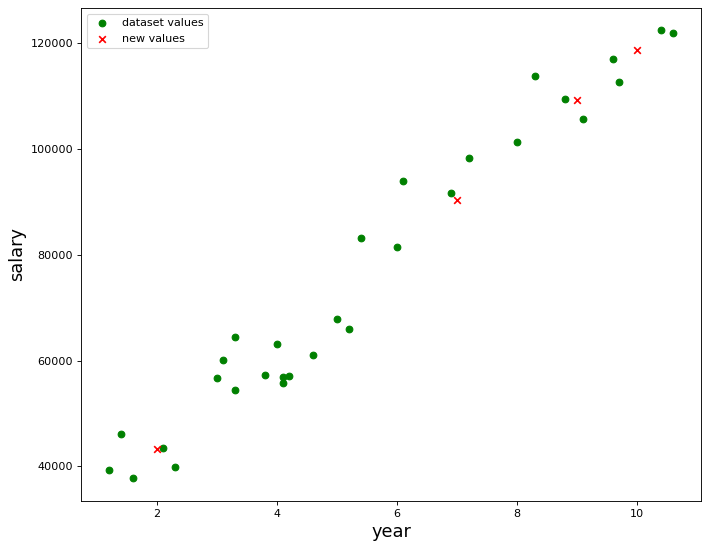

In [20]:
plt.figure(figsize=(10,8),dpi = 80)
plt.scatter(X,y,c = "g",label = "dataset values")
plt.scatter(X_new,y_predict_new,c="r",marker = 'x', label = "new values")
plt.xlabel("year",size = 16)
plt.ylabel("salary",size = 16)
plt.legend()
plt.show()